## Business Problem 
#### * The data here simulates a medical study in which mice infected with a virus were given various doses of two medicines and then checked 2 weeks later to see if they were still infected.
###  Goal is to create a classification model than predict (given two dosages measurements) if the mouse will still be infected with the virus.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import os

In [3]:
os.chdir("C:\\Users\\KIRTI RAJ PRADHAN\\Downloads")

In [4]:
df=pd.read_csv("mouse_viral_study.csv")

In [5]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [7]:
df['Virus Present'].value_counts()

0    200
1    200
Name: Virus Present, dtype: int64

## EDA

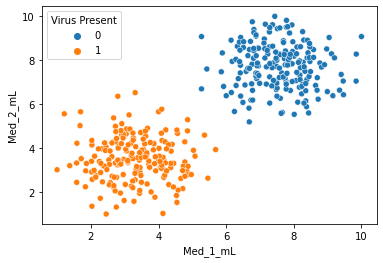

In [10]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df)
plt.show()

In [12]:
X=df[['Med_1_mL','Med_2_mL']]
y=df['Virus Present']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

## Support Vector Machines (SVM)
### with default parameters

In [17]:
# Modelling
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)

# Prediction
ypred_train=model.predict(X_train)
ypred_test=model.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,ypred_train)) # train accuracy
print(accuracy_score(y_test,ypred_test)) #test accuracy

1.0
1.0


In [20]:
model.score(X_train,y_train)

1.0

In [21]:
model.score(X_test,y_test)

1.0

## Hyperparameter Tuning 

In [31]:
from sklearn.model_selection import GridSearchCV

In [33]:
estimator=SVC()
param_grid={'C':[0.01,0.1,1,10,100],'kernel':['linear','rbf','sigmoid','poly']}

In [34]:
grid=GridSearchCV(estimator,param_grid,cv=5)
grid.fit(X,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [35]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

## Rebulid the SVM model with best parameter

In [37]:
model=SVC(kernel='linear',C = 0.01)
model.fit(X_train,y_train)

y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

print(accuracy_score(y_train,y_pred_train))  # train accuracy
print(accuracy_score(y_test,y_pred_test))    # test accuracy

1.0
1.0
